# Generate plots for all datasets

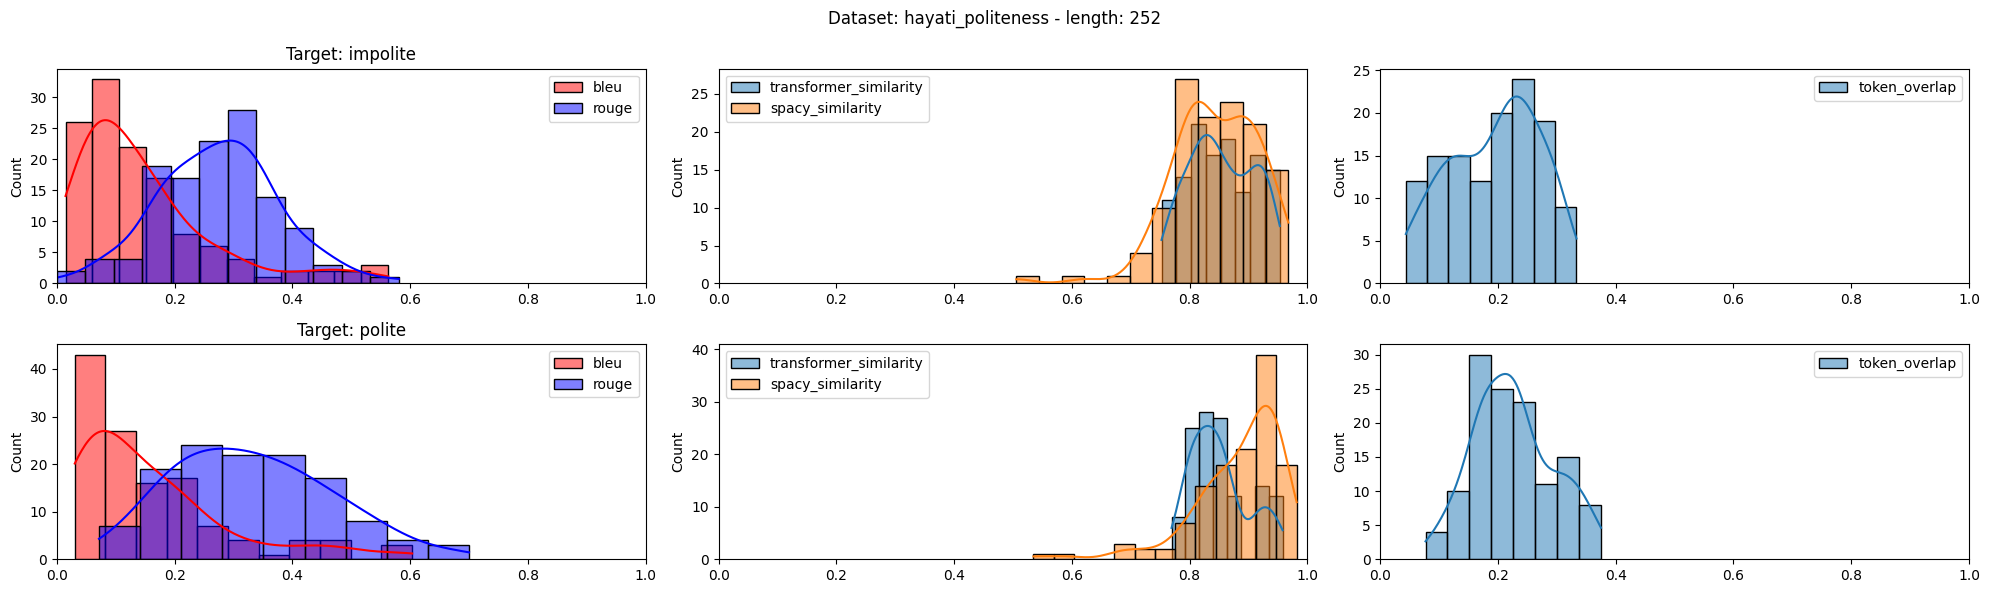

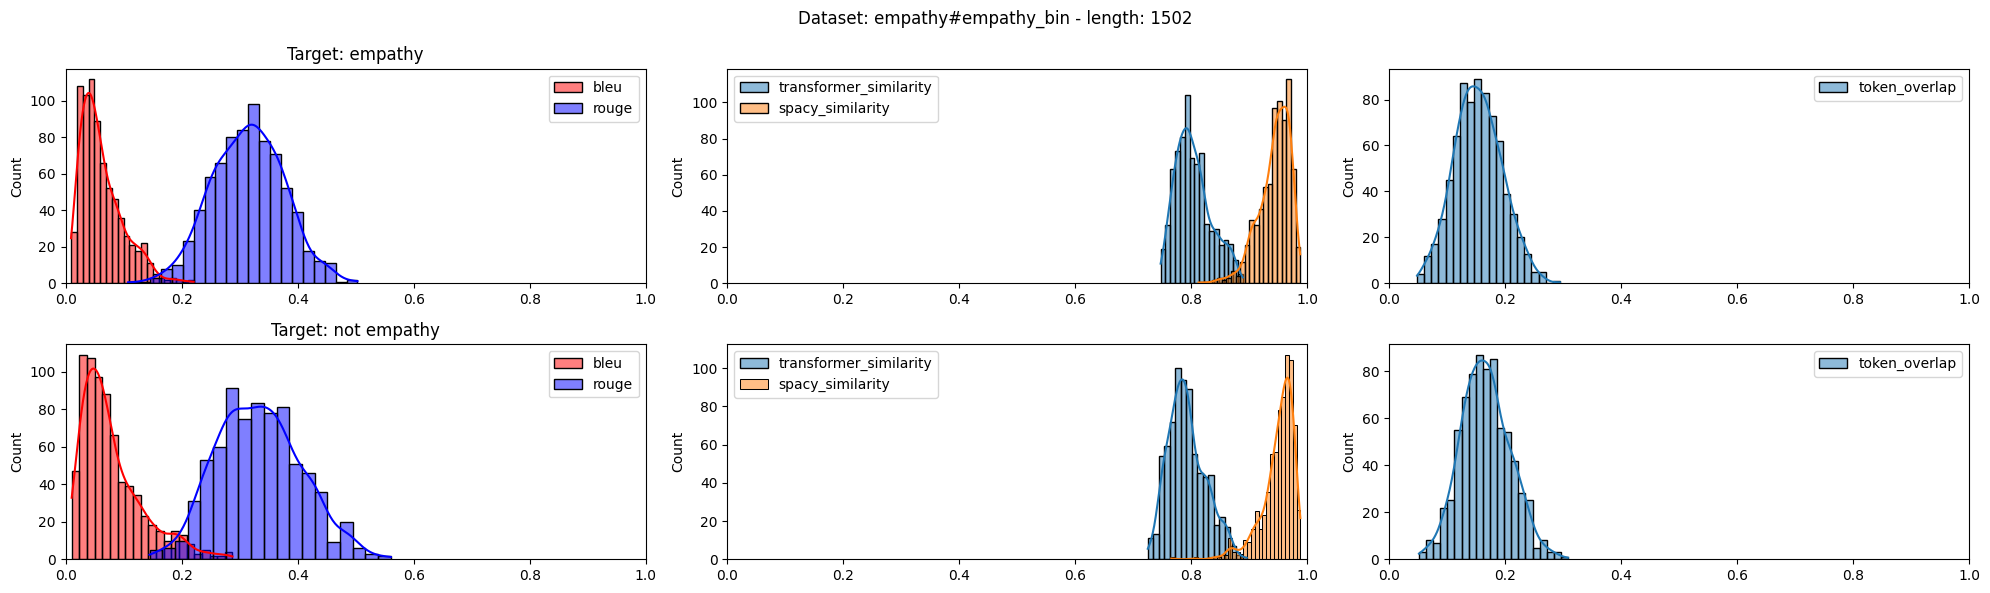

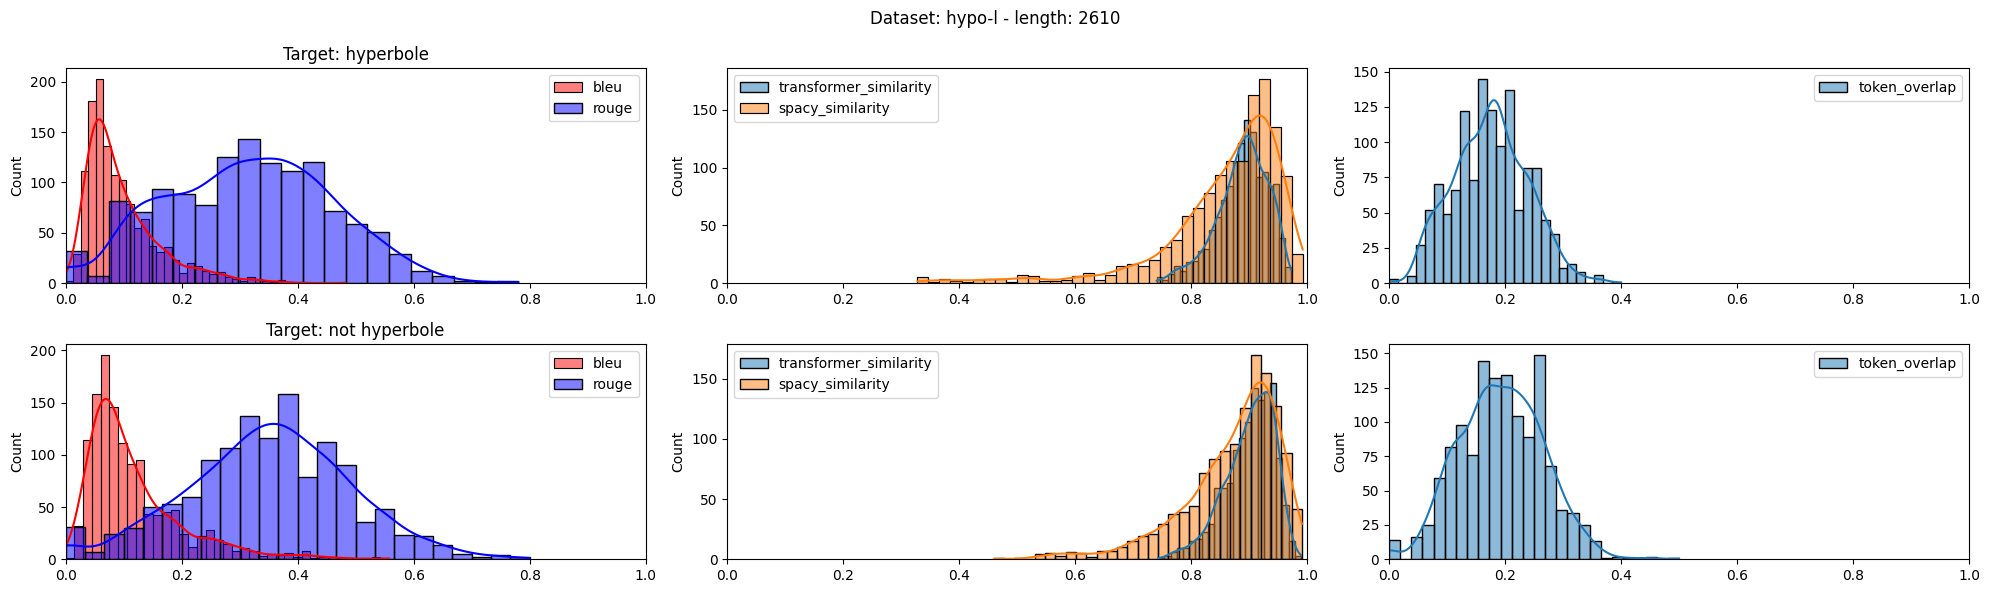

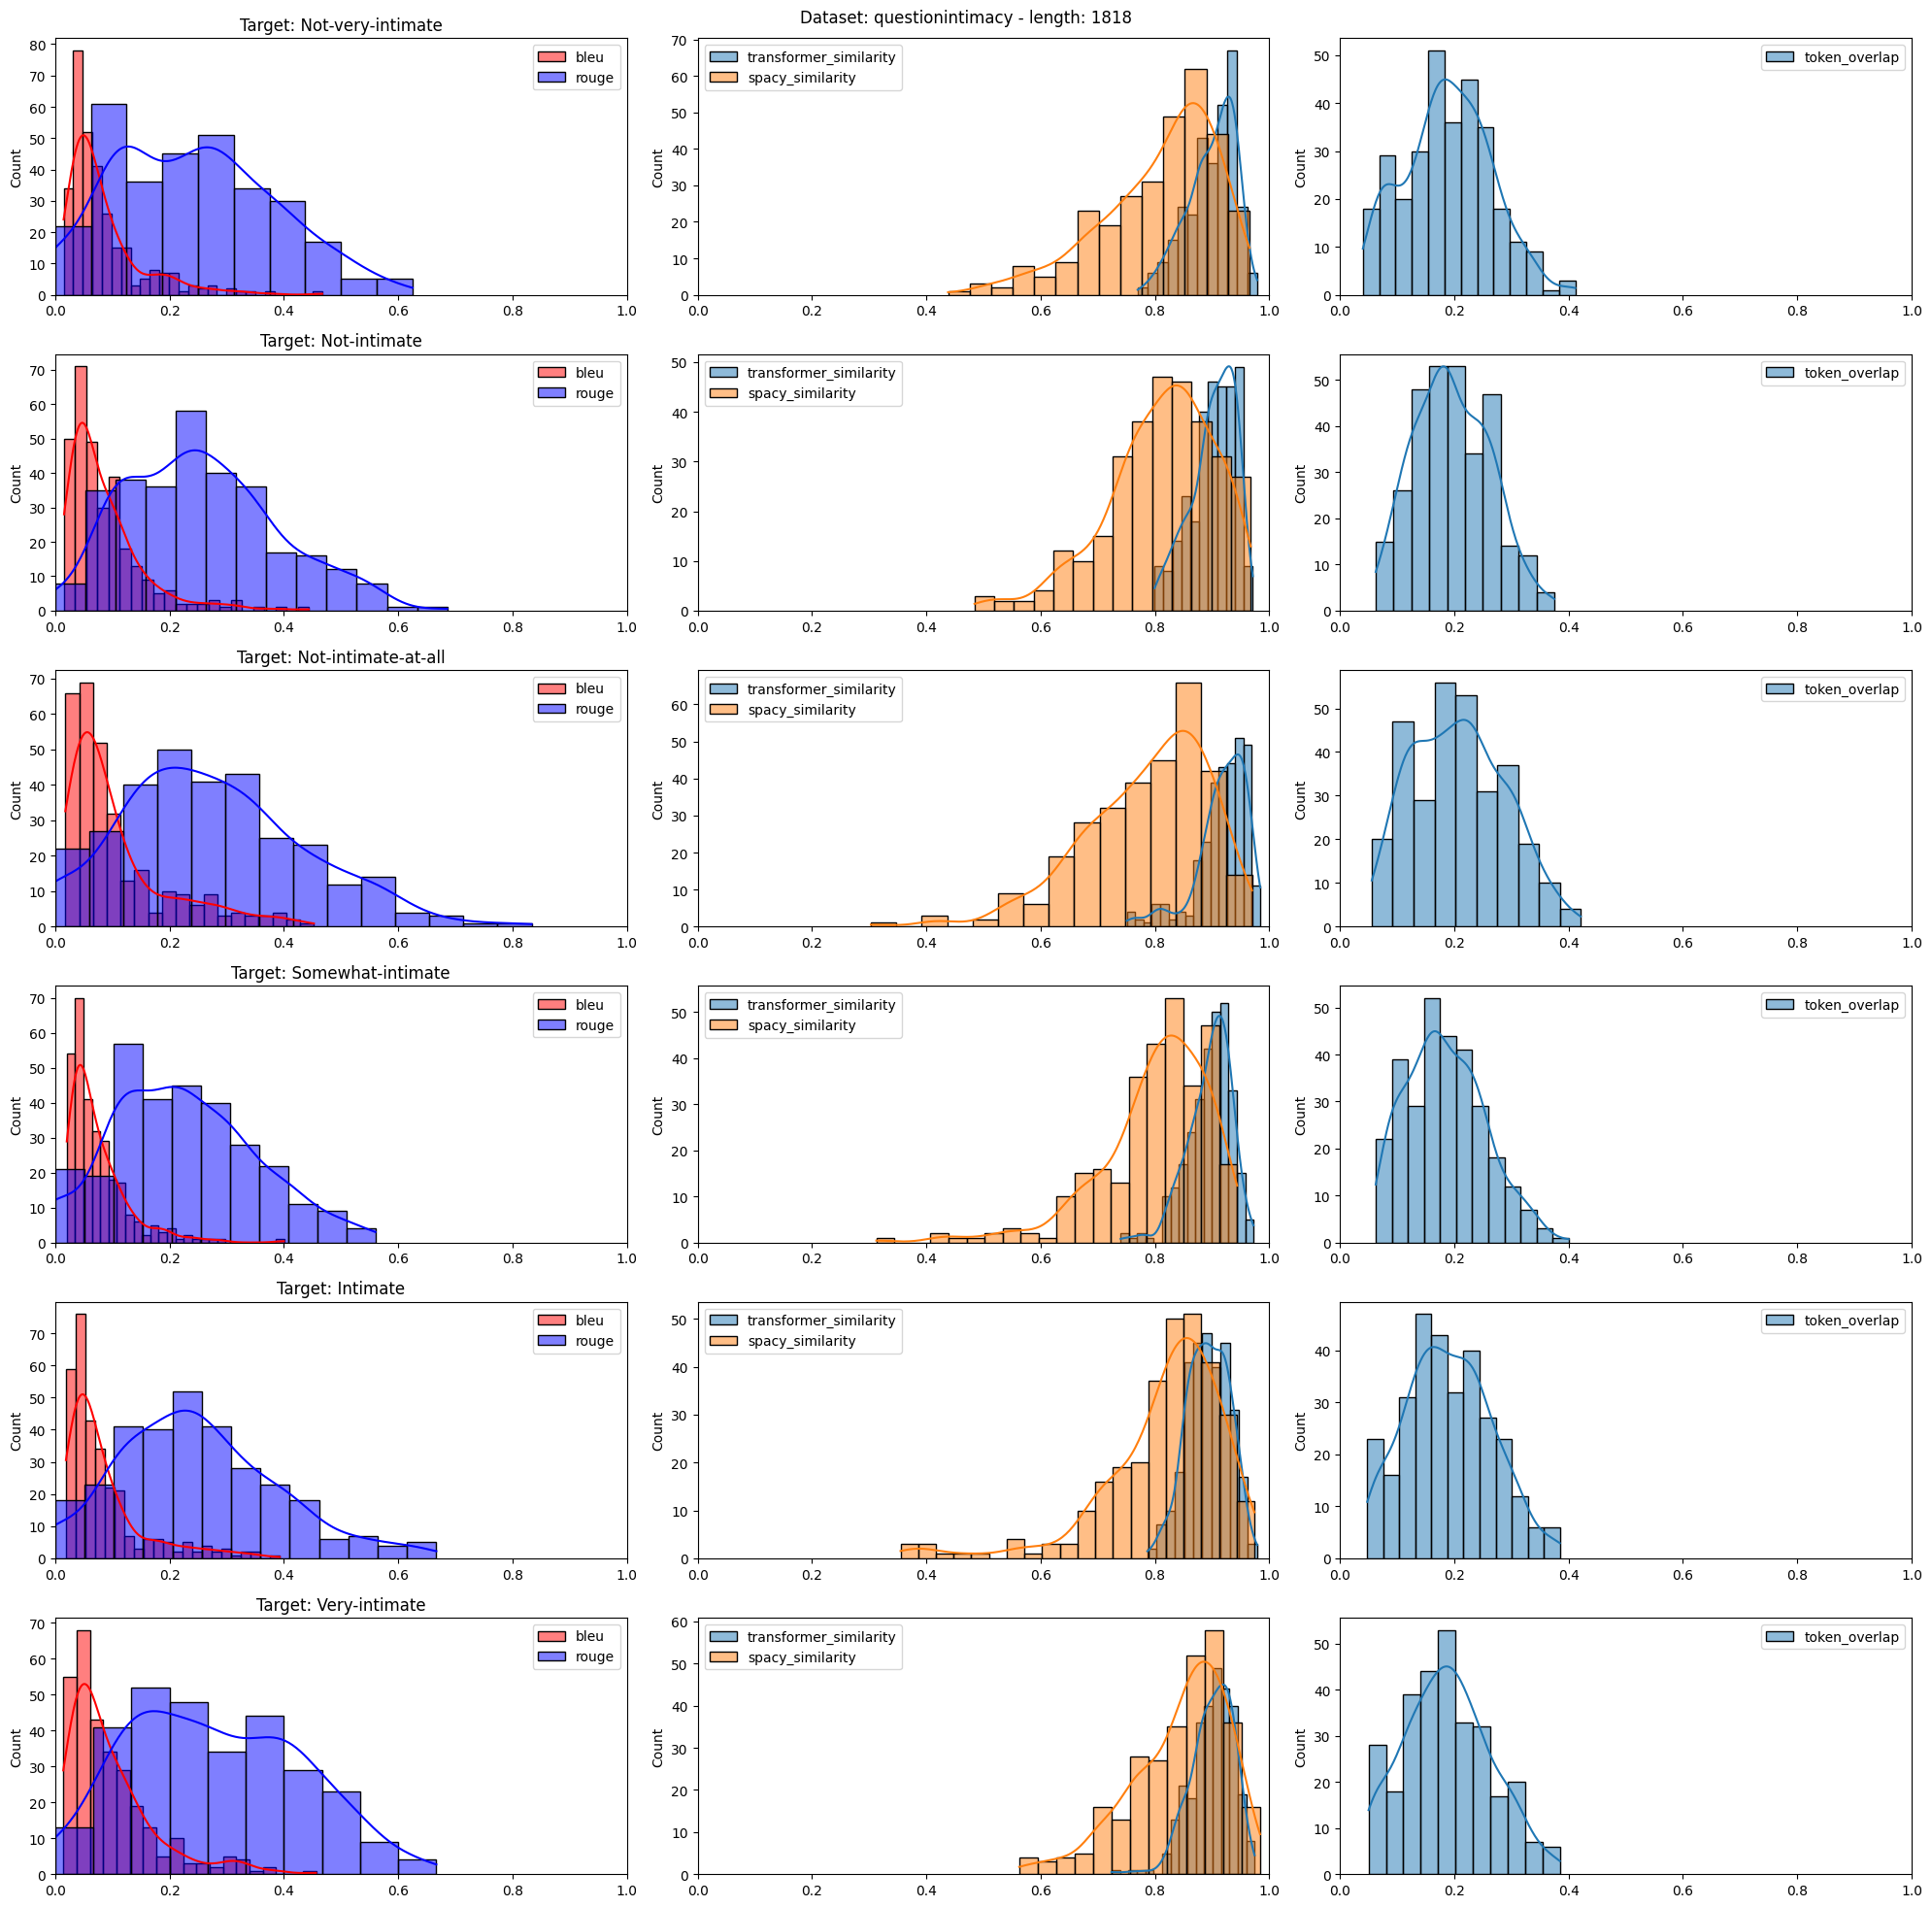

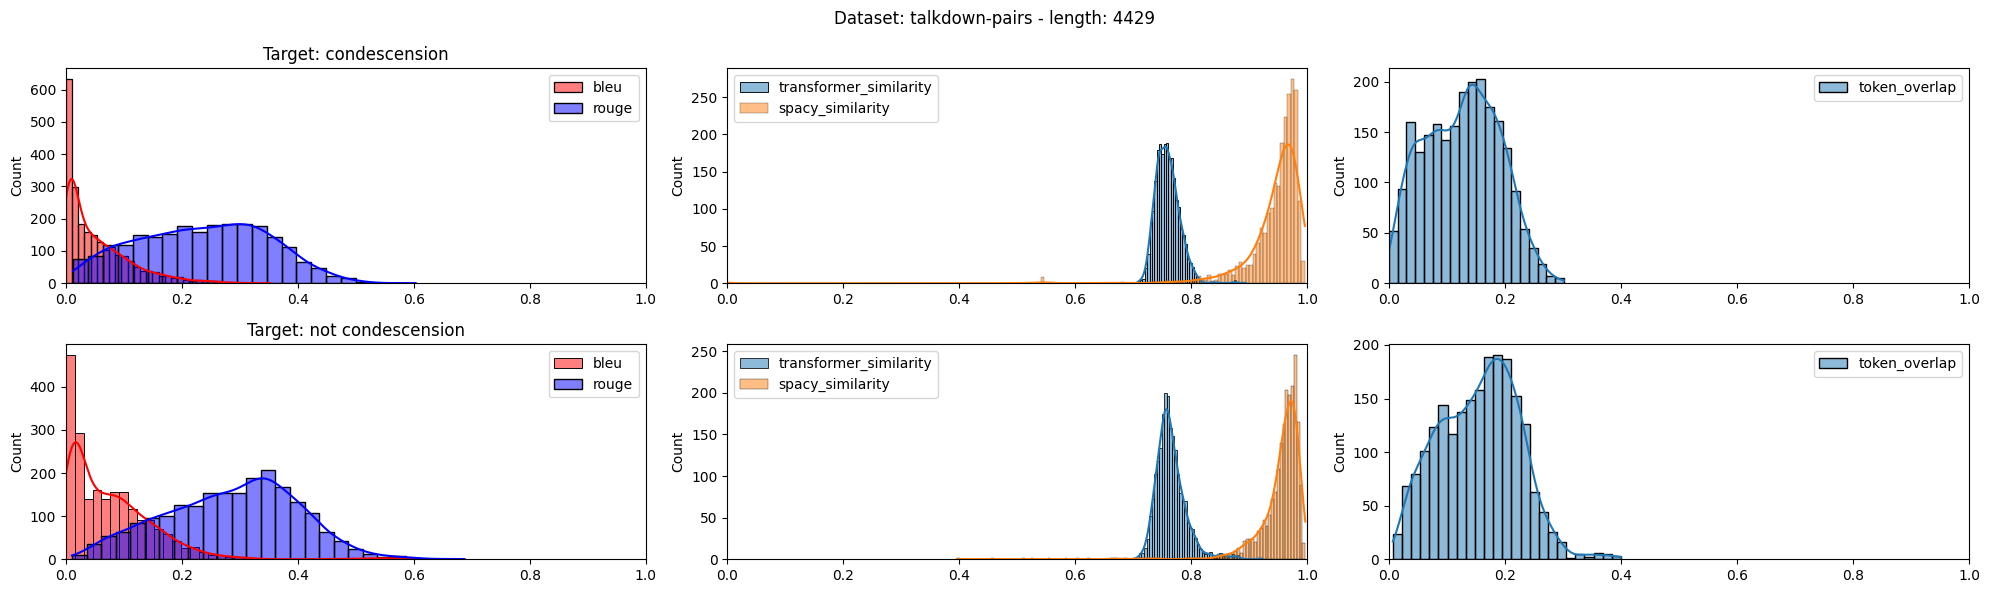

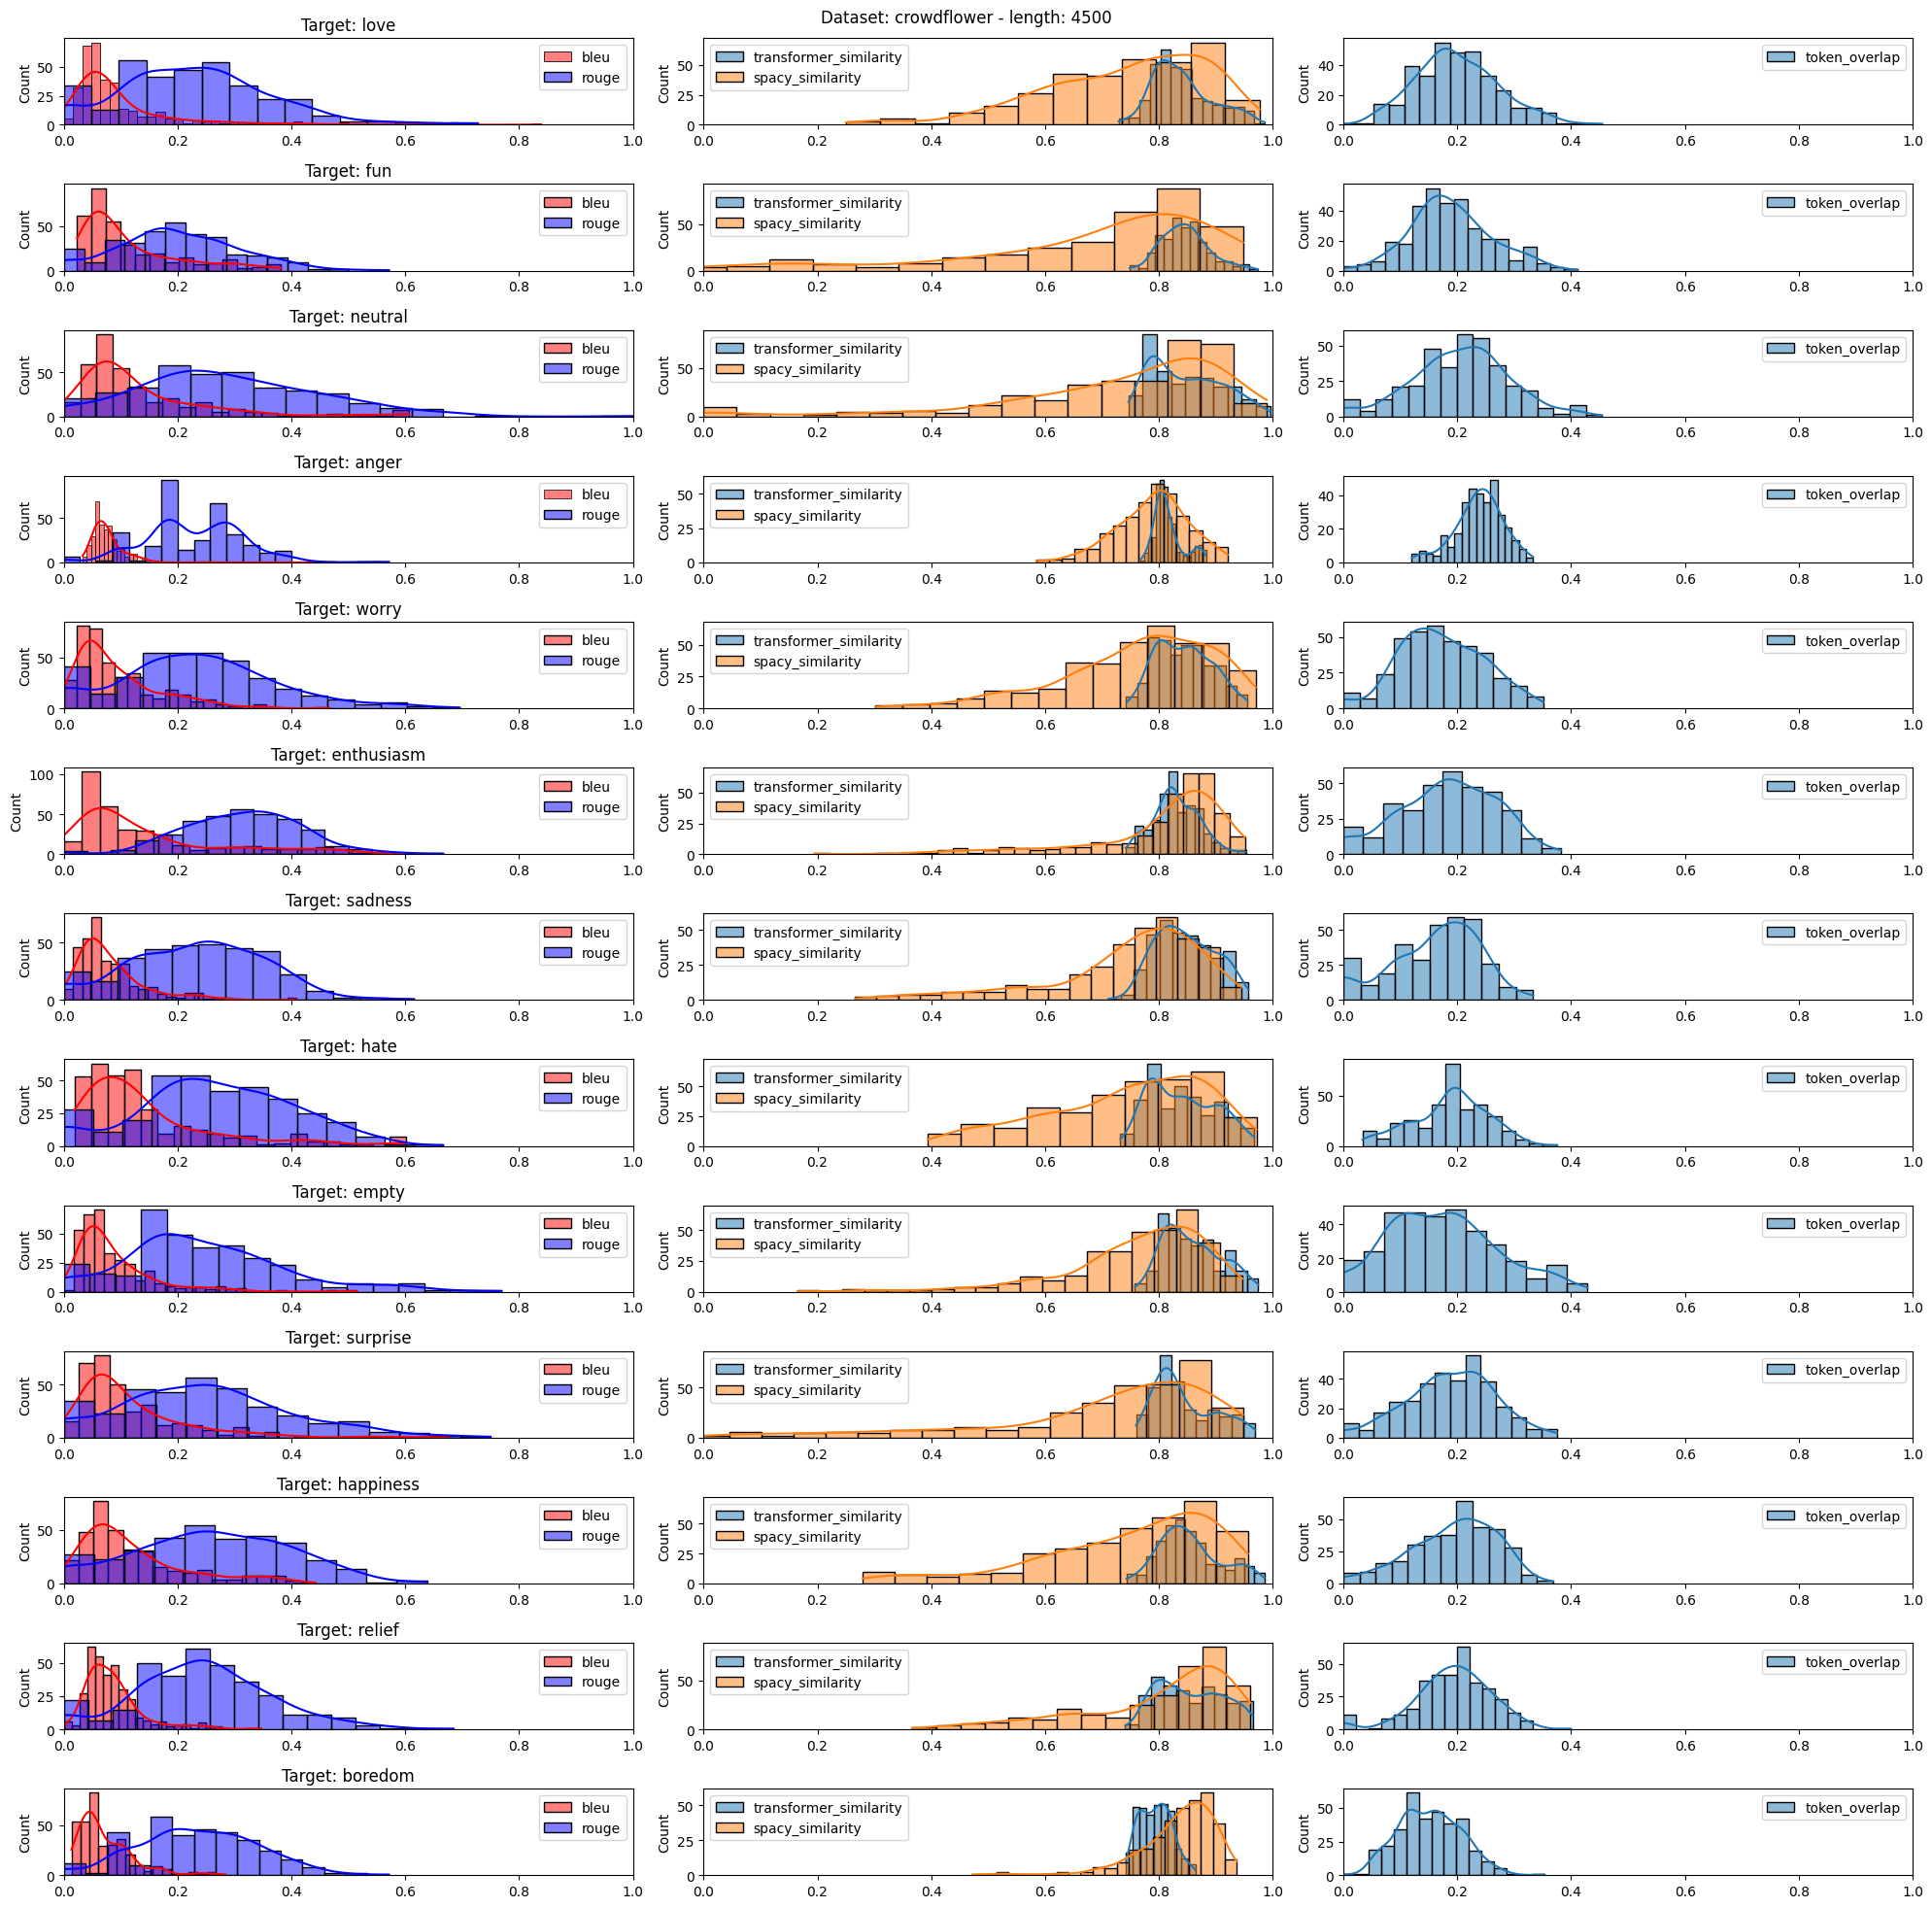

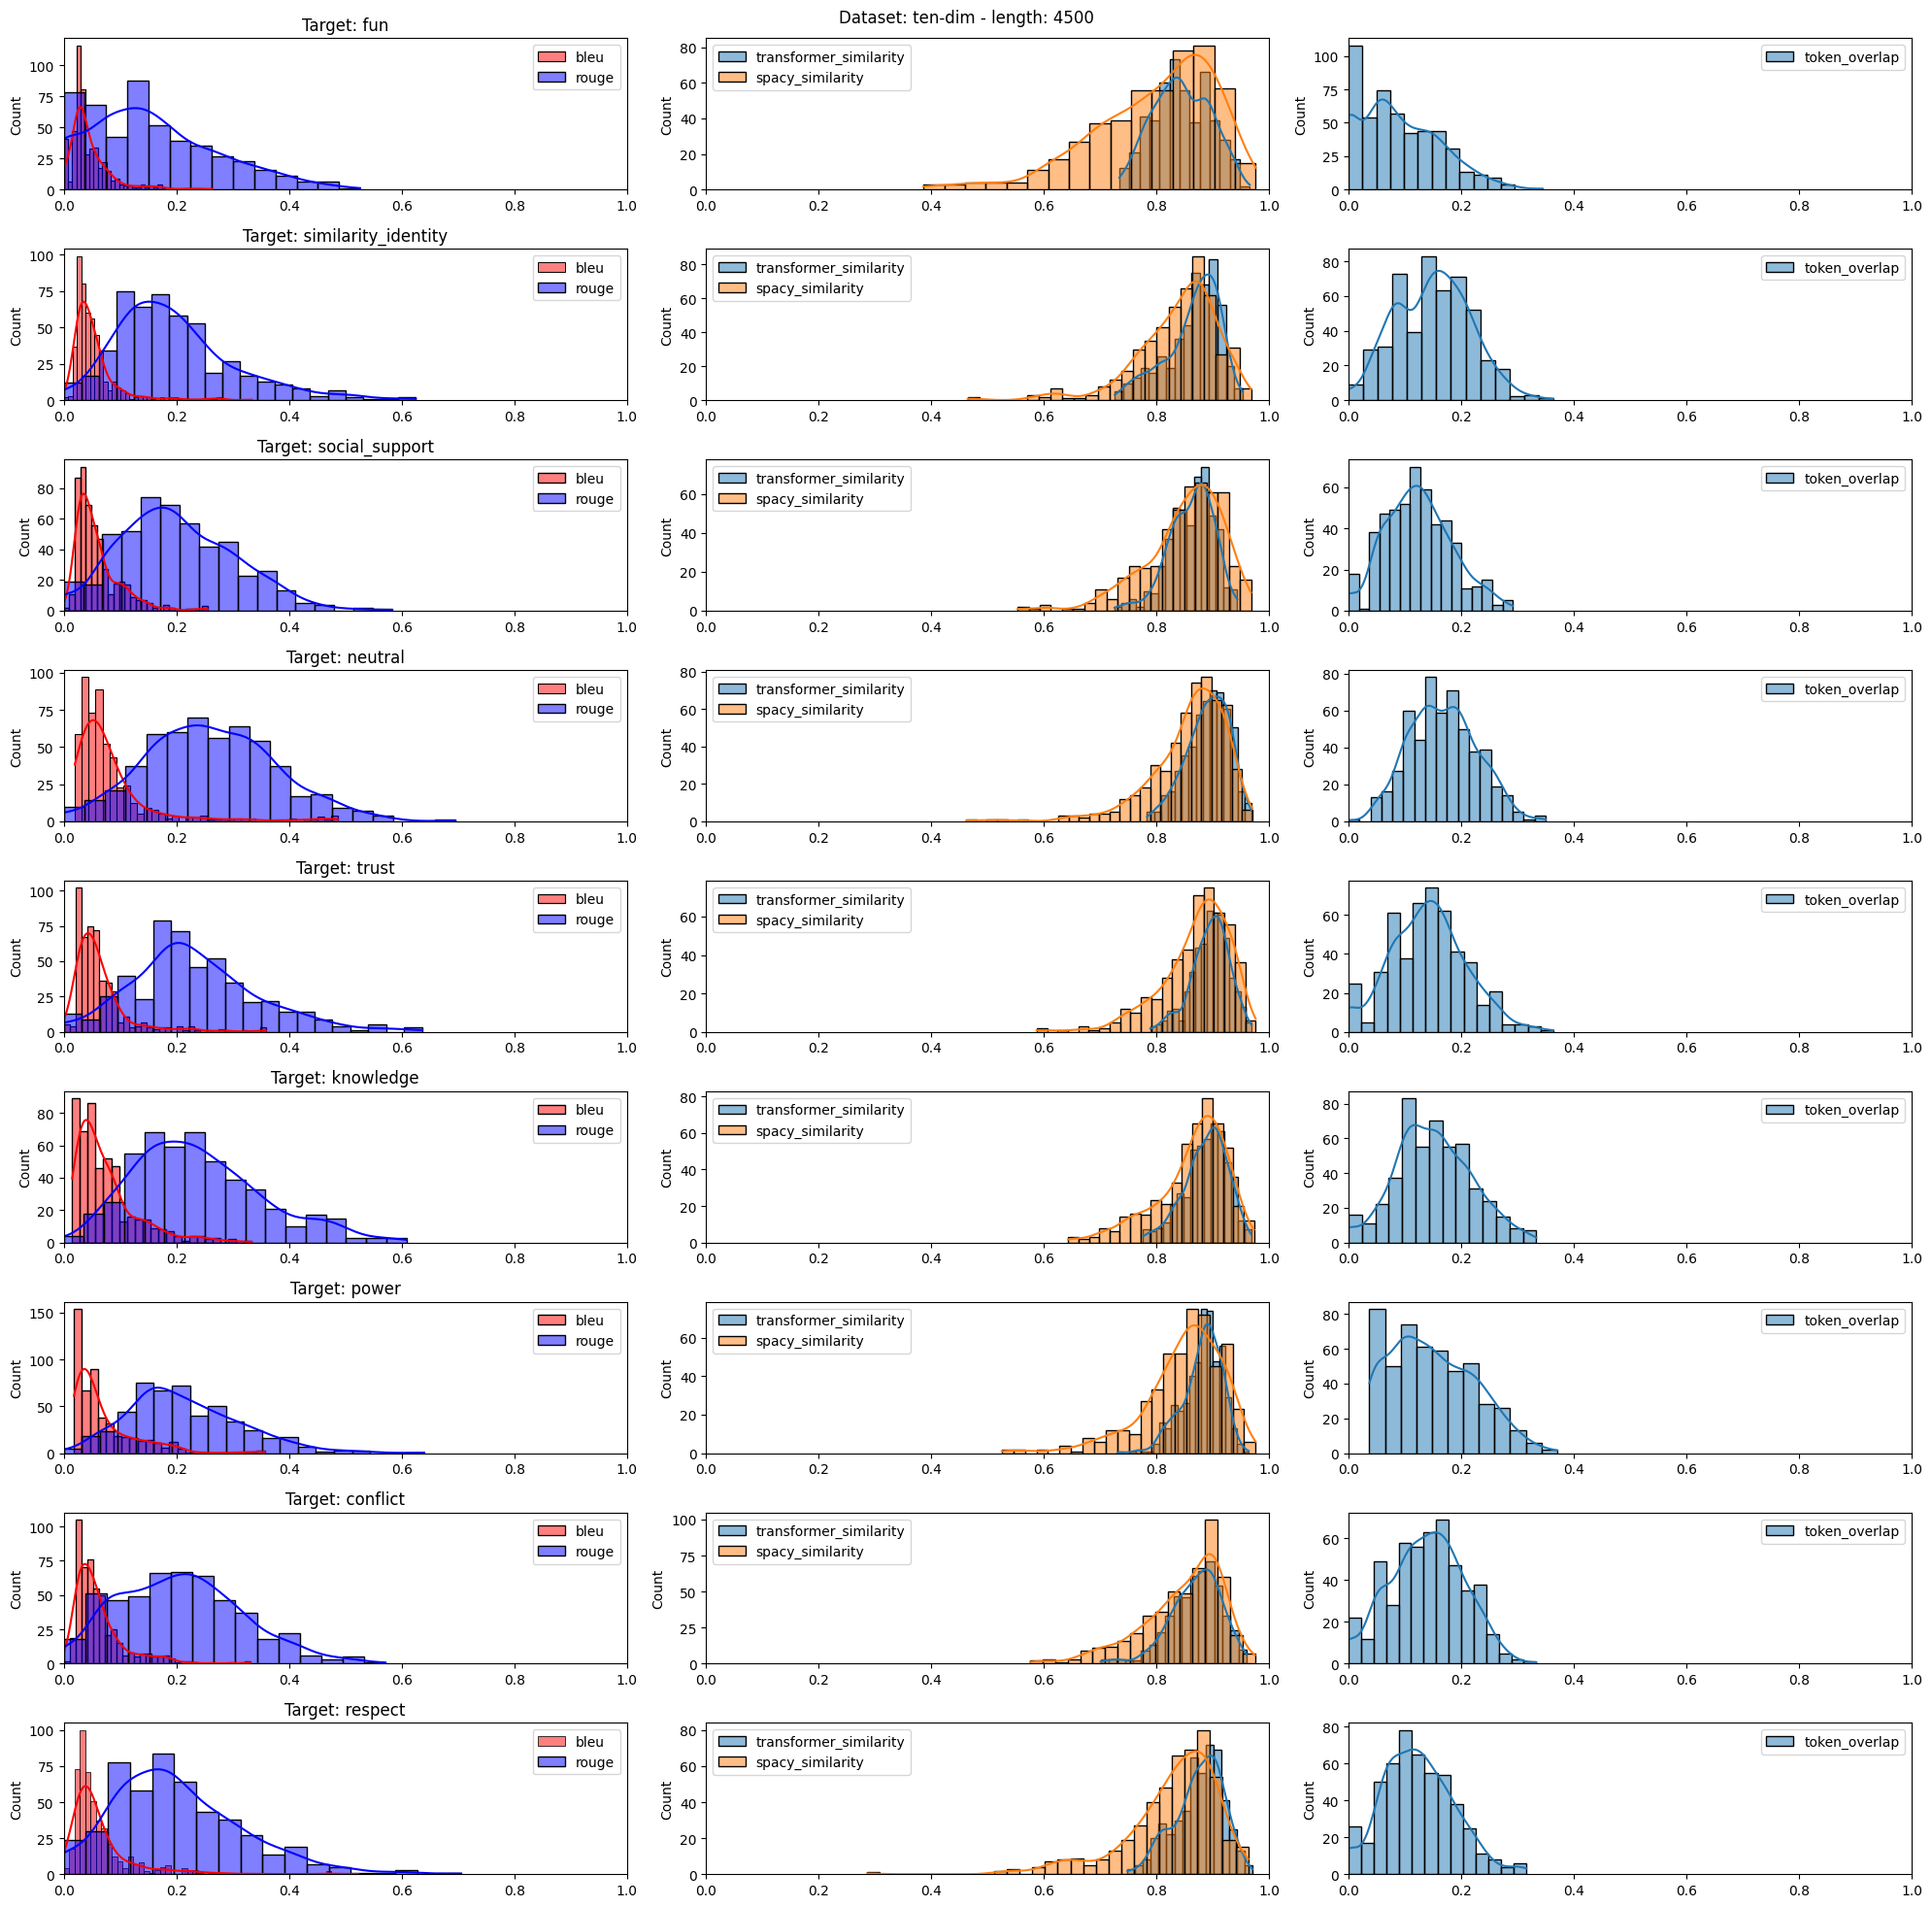

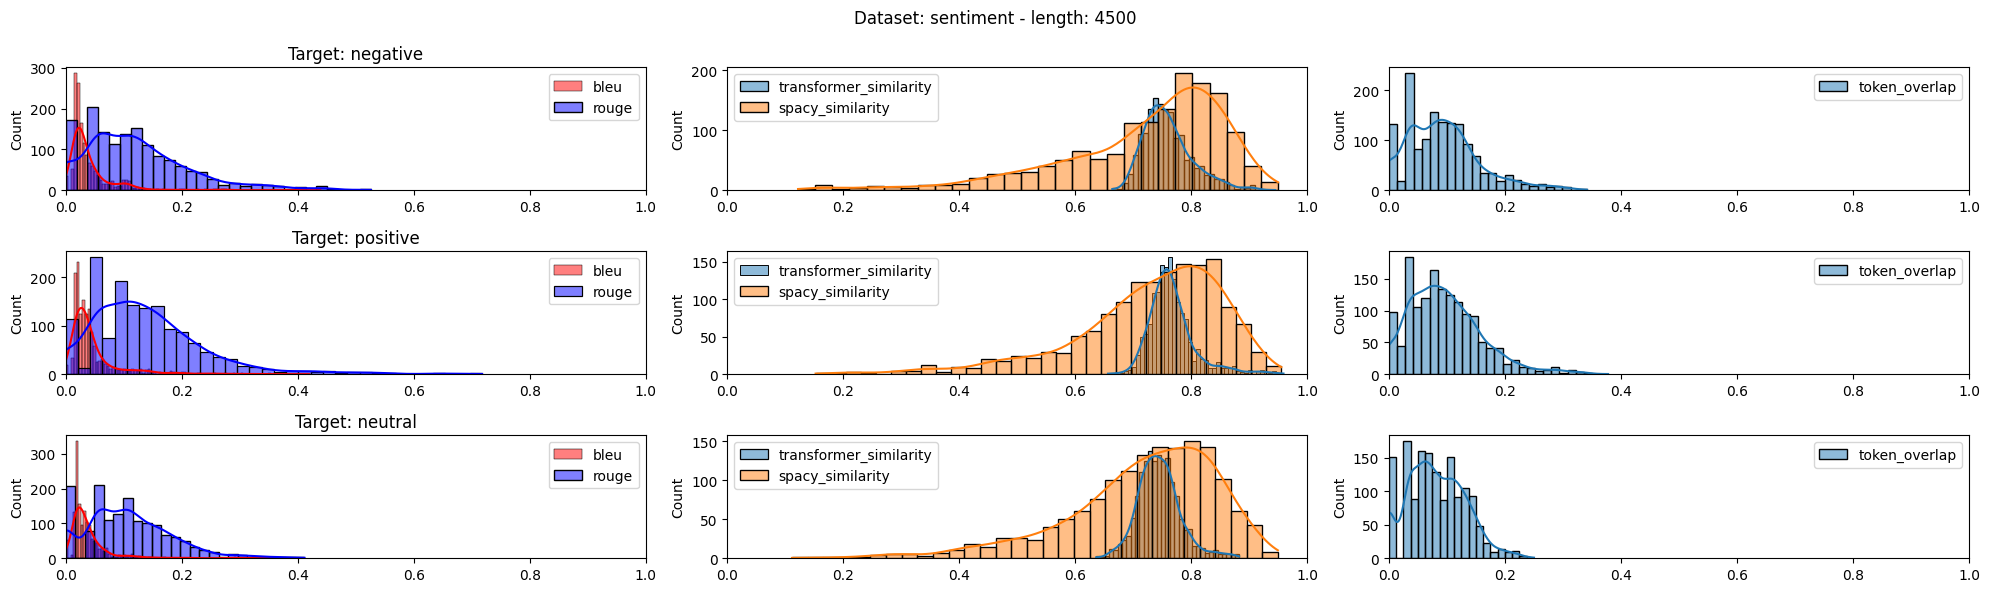

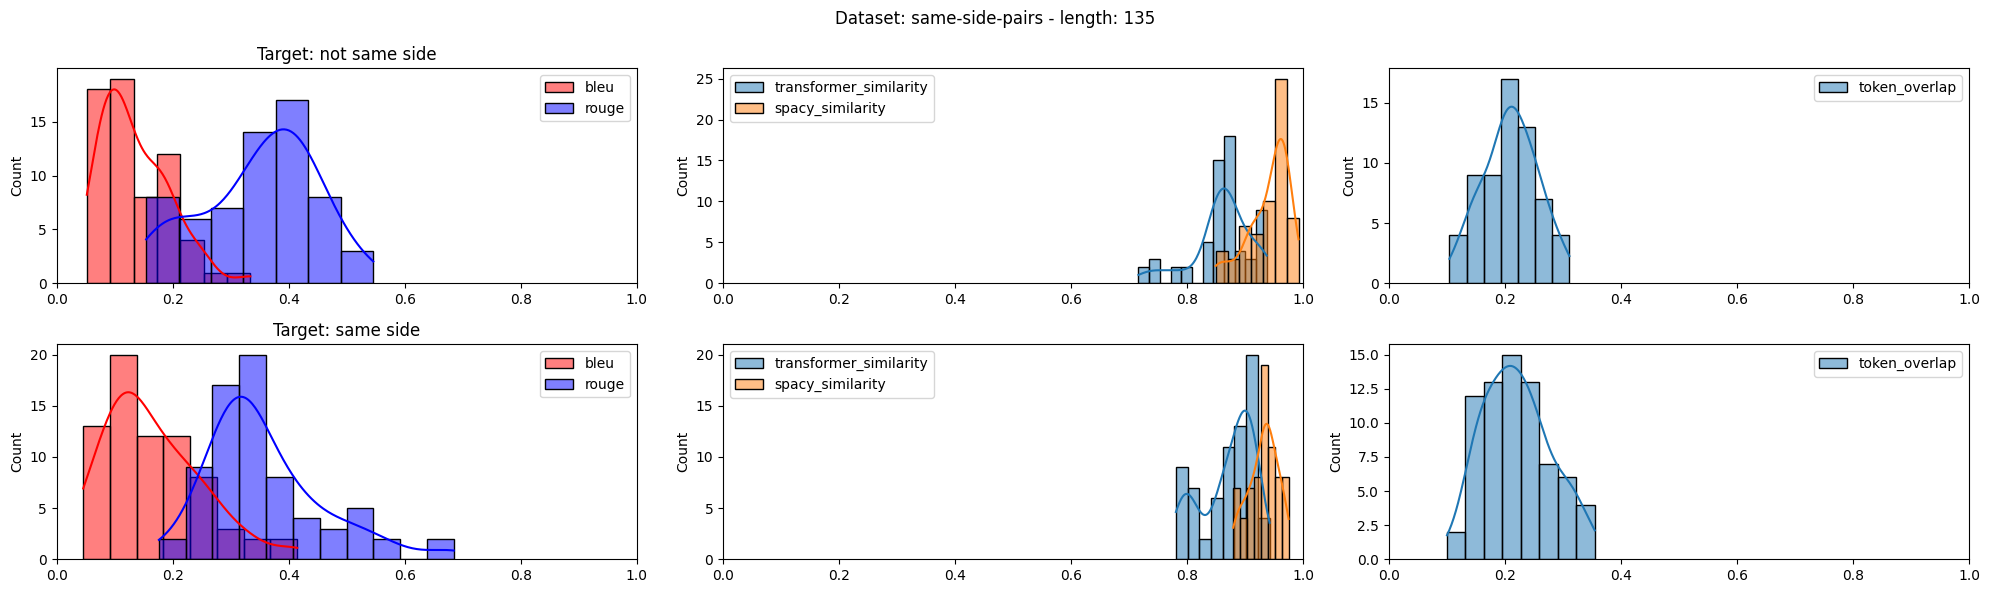

In [24]:
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

datasets = [f_ for f_ in os.listdir("results/") if f_ != ".DS_Store"]

dataset_to_figure_size = {
    "hayati_politeness": (20, 6),
    "empathy#empathy_bin": (20, 6),
    "hypo-l": (20, 6),
    "questionintimacy": (20, 20),
    "talkdown-pairs": (20, 6),
    "crowdflower": (20, 20),
    "ten-dim": (20, 20),
    "sentiment": (20, 6),
    "same-side-pairs": (20, 6),
}

for dataset in datasets:
    results = json.load(open(f"results/{dataset}/similarity.json"))
    length = len(results)

    targets = set([result["target"] for result in results])

    metrics = {
        target: {
            "bleu_score": [],
            "rouge_score": [],
            "transformer_similarity": [],
            "spacy_cosine_similarity": [],
            "percentage_token_overlap": [],
        }
        for target in targets
    }

    bleu = []
    rouge = []
    transformer_similarity = []
    spacy_similarity = []
    token_overlap = []

    for idx, result in enumerate(results):
        metrics[result["target"]]["bleu_score"].append(result["metrics"]["bleu_score"])
        metrics[result["target"]]["rouge_score"].append(
            result["metrics"]["rouge_score"]
        )
        metrics[result["target"]]["transformer_similarity"].append(
            result["metrics"]["transformer_similarity"]
        )
        metrics[result["target"]]["spacy_cosine_similarity"].append(
            result["metrics"]["spacy_cosine_similarity"]
        )
        metrics[result["target"]]["percentage_token_overlap"].append(
            result["metrics"]["vocab_overlap"]["percentage_token_overlap"]
        )

    fig, ax = plt.subplots(len(targets), 3, figsize=dataset_to_figure_size[dataset])
    fig.suptitle(f"Dataset: {dataset} - length: {length}")

    for idx, target in enumerate(targets):
        # Add title for entire row
        ax[idx][0].set_title(f"Target: {target}")

        bleu = metrics[target]["bleu_score"]
        rouge = metrics[target]["rouge_score"]
        transformer_similarity = metrics[target]["transformer_similarity"]
        spacy_similarity = metrics[target]["spacy_cosine_similarity"]
        token_overlap = metrics[target]["percentage_token_overlap"]

        sns.histplot(bleu, ax=ax[idx][0], color="red", label="bleu", kde=True)
        sns.histplot(rouge, ax=ax[idx][0], color="blue", label="rouge", kde=True)

        sns.histplot(
            transformer_similarity,
            ax=ax[idx][1],
            label="transformer_similarity",
            kde=True,
        )
        sns.histplot(
            spacy_similarity, ax=ax[idx][1], label="spacy_similarity", kde=True
        )

        sns.histplot(token_overlap, ax=ax[idx][2], label="token_overlap", kde=True)

        ax[idx][0].legend()
        ax[idx][1].legend()
        ax[idx][2].legend()

        # x-axis should be 0 to 1
        ax[idx][0].set_xlim(0, 1)
        ax[idx][1].set_xlim(0, 1)
        ax[idx][2].set_xlim(0, 1)

    plt.tight_layout()

    plt.savefig(f"assets/{dataset}-histogram.png")

In [1]:
from typing import Dict, List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import assert_path
from utils import load_json

In [2]:
dataset_name: str = "hayati_politeness"
assert_path(f"assets/{dataset_name}/")

# Spacey similarity

Loading results/hayati_politeness/spacy_similarity.json...


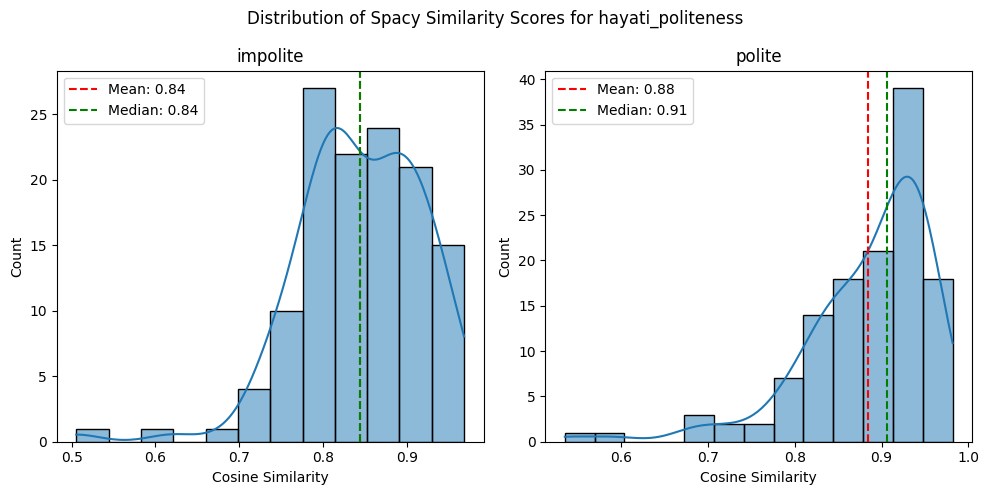

In [3]:
# open the data
filename: str = f"results/{dataset_name}/spacy_similarity.json"
data: Dict = load_json(filename)

# Create distribution plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, target in enumerate(data):
    values: List[float] = data[target]

    sns.histplot(values, kde=True, ax=ax[i])
    mean_polite = np.mean(values)
    median_polite = np.median(values)
    ax[i].axvline(
        mean_polite, color="red", linestyle="--", label=f"Mean: {mean_polite:.2f}"
    )
    ax[i].axvline(
        median_polite,
        color="green",
        linestyle="--",
        label=f"Median: {median_polite:.2f}",
    )
    ax[i].set_title(target)
    ax[i].legend()
    ax[i].set_xlabel("Cosine Similarity")

# add overall title
fig.suptitle(f"Distribution of Spacy Similarity Scores for {dataset_name}")
plt.tight_layout()
plt.savefig(f"assets/{dataset_name}/spacy_similarity_distribution.png")

# Vocab overlap

Loading results/hayati_politeness/vocab_overlap.json...


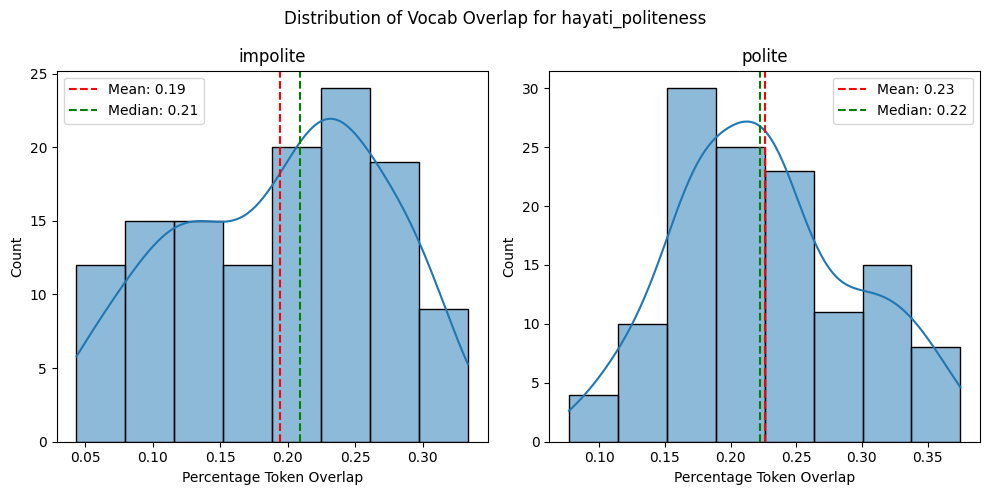

In [4]:
filename: str = f"results/{dataset_name}/vocab_overlap.json"
data: Dict = load_json(filename)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, target in enumerate(data):
    percentages = [entry["percentage_token_overlap"] for entry in data[target]]

    sns.histplot(percentages, kde=True, ax=ax[i])
    mean = np.mean(percentages)
    median = np.median(percentages)

    ax[i].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    ax[i].axvline(
        median,
        color="green",
        linestyle="--",
        label=f"Median: {median:.2f}",
    )
    ax[i].set_title(target)
    ax[i].legend()
    ax[i].set_xlabel("Percentage Token Overlap")

# add overall title
fig.suptitle(f"Distribution of Vocab Overlap for {dataset_name}")
plt.tight_layout()
plt.savefig(f"assets/{dataset_name}/vocab_overlap_distribution.png")

# BLEU and ROUGE

Loading results/hayati_politeness/rouge.json...
Loading results/hayati_politeness/bleu.json...


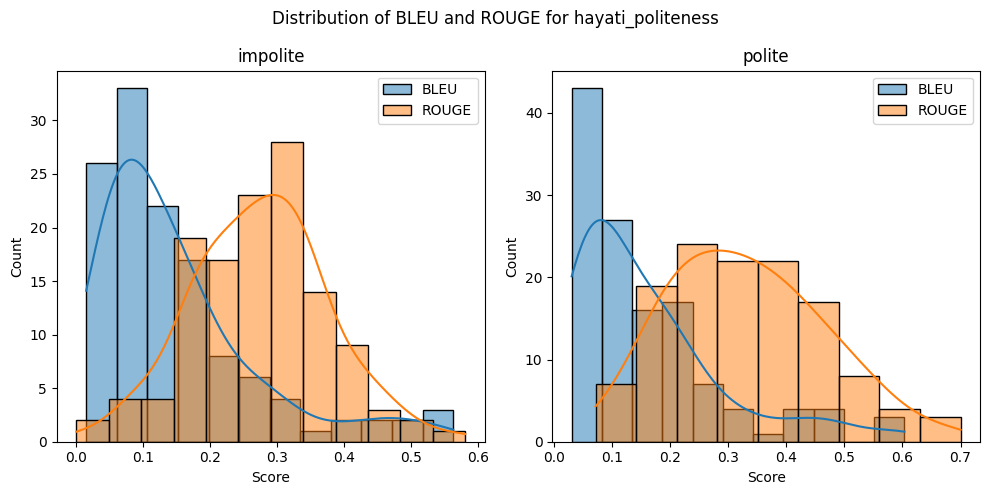

In [5]:
rouge = load_json(f"results/{dataset_name}/rouge.json")
bleu = load_json(f"results/{dataset_name}/bleu.json")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, target in enumerate(rouge):
    bleu_score: List[float] = bleu[target]
    rouge_score: List[float] = rouge[target]

    sns.histplot(bleu_score, kde=True, ax=ax[i], label="BLEU")
    sns.histplot(rouge_score, kde=True, ax=ax[i], label="ROUGE")

    ax[i].set_title(target)
    ax[i].legend()
    ax[i].set_xlabel("Score")

fig.suptitle(f"Distribution of BLEU and ROUGE for {dataset_name}")
plt.tight_layout()
plt.savefig(f"assets/{dataset_name}/bleu_rouge_distribution.png")